In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scripts.metric as metric
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

### Get the data and pre-process the data

In [3]:
df = pd.read_csv('../data/data_not_transformed_ready.csv')
df.head()

,LotFrontage,LotArea,Street,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,141.0,31770,1,1,6,5,1960,1960,112.0,3,...,0,0,0,1,0,0,0,0,1,0
1,80.0,11622,1,1,5,6,1961,1961,0.0,3,...,0,0,0,1,0,0,0,0,1,0
2,81.0,14267,1,1,6,6,1958,1958,108.0,3,...,0,0,0,1,0,0,0,0,1,0
3,93.0,11160,1,1,7,5,1968,1968,0.0,4,...,0,0,0,1,0,0,0,0,1,0
4,74.0,13830,1,1,5,5,1997,1998,0.0,3,...,0,0,0,1,0,0,0,0,1,0


In [4]:
y = df.SalePrice.values
X = df.drop('SalePrice', axis=1).values
# X = X[:,selected_features]
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (2930, 271)
y shape: (2930,)


In [5]:
# Shuffle the data
np.random.seed(527)
p = np.random.permutation(X.shape[0])
X = X[p]
y = y[p]

In [6]:
# Get training, validation, and test data
N = X.shape[0] # 2930 observations in total
num_trn = 2200
num_val = 230
num_tst = N - num_trn - num_val # 500
trn_mask = range(0,num_trn)
val_mask = range(num_trn,num_trn+num_val)
tst_mask = range(num_trn+num_val,N)
X_trn = X[trn_mask]
y_trn = y[trn_mask]
X_val = X[val_mask]
y_val = y[val_mask]
X_tst = X[tst_mask]
y_tst = y[tst_mask]

In [7]:
# Standardize Features
mean = X_trn.mean()
std  = X_trn.std()
X_trn = (X_trn - mean) / std
X_val = (X_val - mean) / std
X_tst = (X_tst - mean) / std

### Helper Functions

In [8]:
def eval_model(model, title):
  print("Training:")
  metric.evaluate(y_trn, model.predict(X_trn), title+" Training", title+" trn.png")
  print("Validation:")
  metric.evaluate(y_val, model.predict(X_val), title+" Validation", title+" val.png")
  print("Test:")
  metric.evaluate(y_tst, model.predict(X_tst), title+" Test", title+" tst.png")

### PCA on Training Set

In [9]:
dfX = df.drop('SalePrice', axis=1)

[  9.79192893e-01   6.62630713e-03   4.58268423e-03   3.88358682e-03
   3.49312127e-03   6.90432398e-04   4.22132124e-04   4.01134511e-04
   2.98290269e-04   1.81201893e-04   5.96319775e-05   4.94729627e-05
   4.04518648e-05   3.71018501e-05   1.18567351e-05]


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


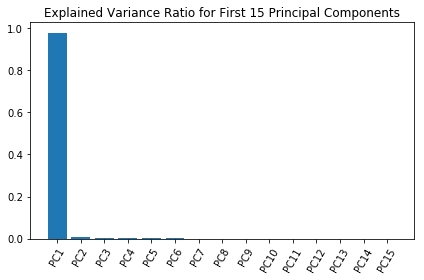

pc1, explained variance ratio 0.9791928929248003


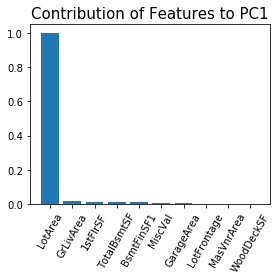

LotArea 0.99956614819
GrLivArea 0.0161362852338
1stFlrSF 0.0151412433919
TotalBsmtSF 0.013372769617
BsmtFinSF1 0.0110113925235
MiscVal 0.00533239468297
GarageArea 0.00512441971417
LotFrontage 0.00274698248498
MasVnrArea 0.00238915103983
WoodDeckSF 0.00218739658849
pc2, explained variance ratio 0.006626307134247129


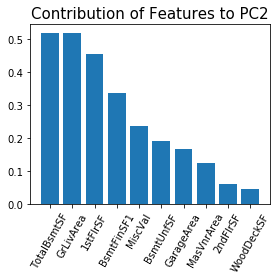

TotalBsmtSF 0.51791424429
GrLivArea 0.516382215405
1stFlrSF 0.453876369585
BsmtFinSF1 0.335882740922
MiscVal 0.23747711757
BsmtUnfSF 0.192623400552
GarageArea 0.168367540051
MasVnrArea 0.125155468744
2ndFlrSF 0.0621318988679
WoodDeckSF 0.0467423480754
pc3, explained variance ratio 0.004582684229620012


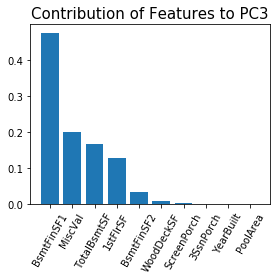

BsmtFinSF1 0.474196020089
MiscVal 0.201113331728
TotalBsmtSF 0.166728758865
1stFlrSF 0.128712857703
BsmtFinSF2 0.0345480820714
WoodDeckSF 0.00946671535236
ScreenPorch 0.00274175476246
3SsnPorch 0.0015900552031
YearBuilt 0.00144130426983
PoolArea 0.000713839206297


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)
pca.fit(X_trn)
# show results of pca
print(pca.explained_variance_ratio_)

plt.bar(range(pca.n_components), pca.explained_variance_ratio_)
plt.xticks(
  range(pca.n_components),
  ["PC{}".format(i) for i in range(1, pca.n_components+1)],
  rotation=60)
plt.title("Explained Variance Ratio for First {} Principal Components".format(pca.n_components))
plt.savefig("pca_explained_ratio.png")
plt.show()


for pcID in range(3):
  print("pc{}, explained variance ratio {}".format(
    pcID+1, pca.explained_variance_ratio_[pcID]))
  num_features = 10
  colIDs = pca.components_[pcID].argsort()[::-1][:num_features]
  col_names = dfX.columns[colIDs]
  heights = pca.components_[pcID][colIDs]
  plt.figure(figsize=(4, 4))
  plt.bar(range(num_features), heights, align='center')
  plt.xticks(range(num_features), col_names, rotation=60)
  plt.title("Contribution of Features to PC{}".format(pcID+1), size=15)
  plt.savefig("contribution_to_pc{}.png".format(pcID+1))
  plt.show()
  for fID in pca.components_[pcID].argsort()[::-1][:10]:
    print(dfX.columns[fID], pca.components_[pcID][fID])

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(X_trn)
X_trn = pca.transform(X_trn)
X_val = pca.transform(X_val)
X_tst = pca.transform(X_tst)

### Linear Regression without Regularization

alpha: 0, rmse_val: 0.2229707793562271
Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Training:
RMSE: 0.23456644697733423
R2: 0.6654563502115531


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


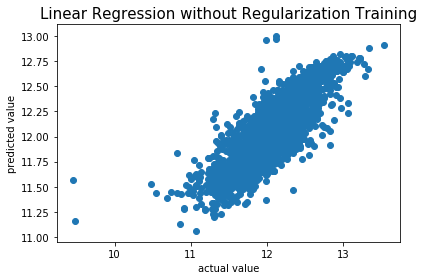

Validation:
RMSE: 0.2229707793562271
R2: 0.7124372404833996


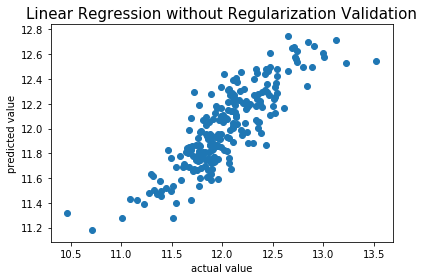

Test:
RMSE: 0.23909726105856938
R2: 0.6629210531242808


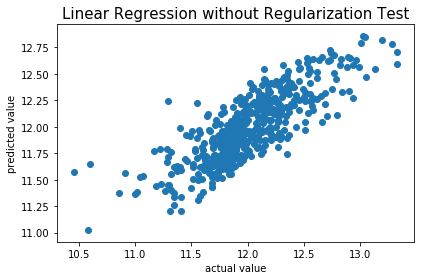

In [12]:
from sklearn import linear_model
alphas = [0]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression without Regularization")

In [13]:
print("num: {:e}".format(62198356.001175))

num: 6.219836e+07


### Ridge Regression

alpha: 1.5e-07, rmse_val: 0.22297078213264443
alpha: 2.25e-07, rmse_val: 0.22297078352085387
alpha: 3.375e-07, rmse_val: 0.22297078560316874
alpha: 5.0625e-07, rmse_val: 0.222970788726643
alpha: 7.593749999999999e-07, rmse_val: 0.22297079341185866
alpha: 1.1390625e-06, rmse_val: 0.22297080043969203
alpha: 1.70859375e-06, rmse_val: 0.2229708109814638
alpha: 2.562890625e-06, rmse_val: 0.2229708267941707
alpha: 3.8443359375e-06, rmse_val: 0.22297085051334165
alpha: 5.766503906249999e-06, rmse_val: 0.222970886092347
alpha: 8.649755859375e-06, rmse_val: 0.22297093946141533
alpha: 1.29746337890625e-05, rmse_val: 0.2229710195162784
alpha: 1.946195068359375e-05, rmse_val: 0.22297113960140896
alpha: 2.9192926025390623e-05, rmse_val: 0.2229713197354859
alpha: 4.3789389038085936e-05, rmse_val: 0.22297158995095784
alpha: 6.56840835571289e-05, rmse_val: 0.22297199530646666
alpha: 9.852612533569336e-05, rmse_val: 0.2229726034124012
alpha: 0.00014778918800354004, rmse_val: 0.2229735157347939
alpha: 0

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


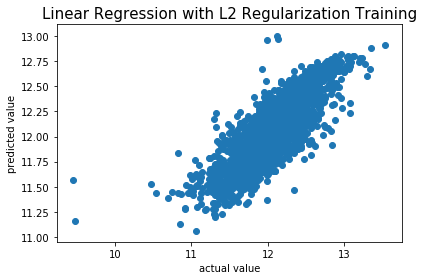

Validation:
RMSE: 0.22297078213264443
R2: 0.7124372333219748


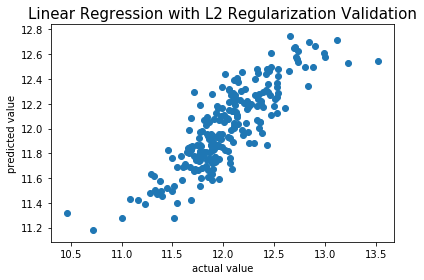

Test:
RMSE: 0.23909726206857018
R2: 0.6629210502764857


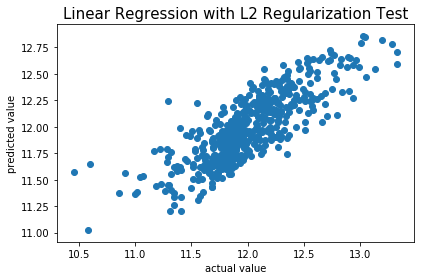

In [14]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Linear Regression with L2 Regularization")

### Lasso Regression

alpha: 1.5e-07, rmse_val: 0.22297238832107377
alpha: 2.25e-07, rmse_val: 0.22297319312103261
alpha: 3.375e-07, rmse_val: 0.22297440071788352
alpha: 5.0625e-07, rmse_val: 0.22297621300619838
alpha: 7.593749999999999e-07, rmse_val: 0.22297893344795558
alpha: 1.1390625e-06, rmse_val: 0.22298301863130748
alpha: 1.70859375e-06, rmse_val: 0.22298915657735646
alpha: 2.562890625e-06, rmse_val: 0.2229983863792319
alpha: 3.8443359375e-06, rmse_val: 0.22301228256159764
alpha: 5.766503906249999e-06, rmse_val: 0.22303324264126553
alpha: 8.649755859375e-06, rmse_val: 0.2230649432468967
alpha: 1.29746337890625e-05, rmse_val: 0.2231130799848921
alpha: 1.946195068359375e-05, rmse_val: 0.22318660230537685
alpha: 2.9192926025390623e-05, rmse_val: 0.22329984641252534
alpha: 4.3789389038085936e-05, rmse_val: 0.22347636322345169
alpha: 6.56840835571289e-05, rmse_val: 0.22375606466889056
alpha: 9.852612533569336e-05, rmse_val: 0.2242090664113002
alpha: 0.00014778918800354004, rmse_val: 0.22495276034977302
al

/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


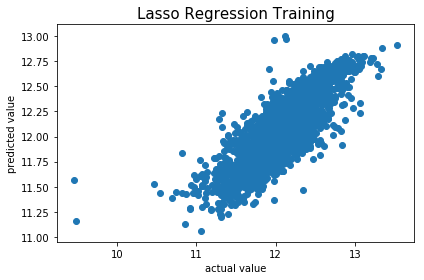

Validation:
RMSE: 0.22297238832107377
R2: 0.712433090342812


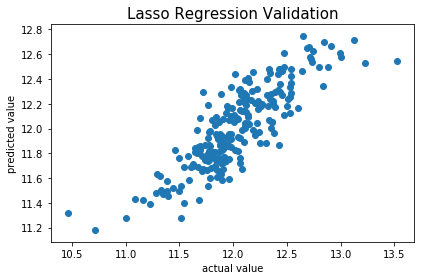

Test:
RMSE: 0.23909782777079958
R2: 0.6629194552223452


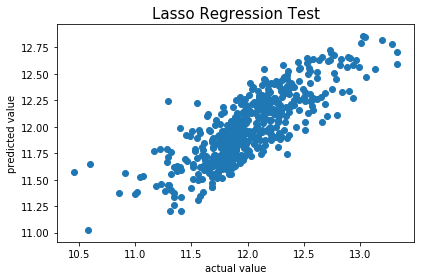

In [15]:
from sklearn import linear_model
alphas = [1e-7*(1.5**i) for i in range(1, 40)]
best_rmse = None
best_model = None
for alpha in alphas:
  model = linear_model.Lasso(alpha=alpha)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("alpha: {}, rmse_val: {}".format(alpha, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model

print(best_model)    
eval_model(best_model, "Lasso Regression")

### SVR

C: 3.000e+00, epsilon: 1.200e-03, rmse_val: 0.23250815278429102
C: 9.000e+00, epsilon: 1.200e-03, rmse_val: 0.22795095402705182
C: 2.700e+01, epsilon: 1.200e-03, rmse_val: 0.2266798702262706
C: 8.100e+01, epsilon: 1.200e-03, rmse_val: 0.2258447946518829
C: 2.430e+02, epsilon: 1.200e-03, rmse_val: 0.22574338508504063
C: 7.290e+02, epsilon: 1.200e-03, rmse_val: 0.22657190086710666
C: 2.187e+03, epsilon: 1.200e-03, rmse_val: 0.22702849914495976
C: 6.561e+03, epsilon: 1.200e-03, rmse_val: 0.22683657096223267
C: 1.968e+04, epsilon: 1.200e-03, rmse_val: 0.22681836465233365
SVR(C=243, cache_size=200, coef0=0.0, degree=3, epsilon=0.0012, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Training:
RMSE: 0.23483028940834486
R2: 0.6647033315882609


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


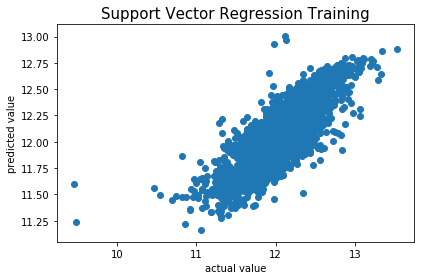

Validation:
RMSE: 0.22574338508504063
R2: 0.7052411828312465


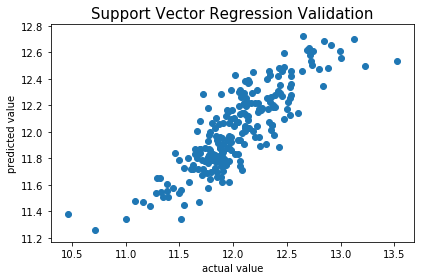

Test:
RMSE: 0.2402310047200592
R2: 0.659716774017396


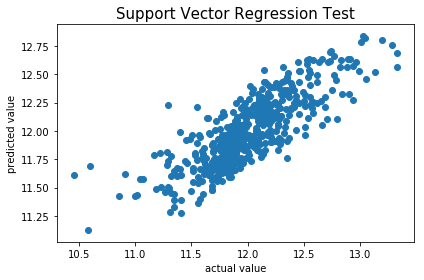

In [18]:
from sklearn.svm import SVR
Cs = [1*(3**i) for i in range(1, 10)]
epsilons = [0.0012]

best_rmse = None
best_model = None
for C in Cs:
  for epsilon in epsilons:
    model = SVR(kernel='rbf', C=C, epsilon=epsilon)
    model.fit(X_trn, y_trn)
    rmse_val = metric.rmse(y_val, model.predict(X_val))
    print("C: {:.3e}, epsilon: {:.3e}, rmse_val: {}".format(C, epsilon, rmse_val))
    if best_rmse is None or rmse_val < best_rmse:
      best_rmse = rmse_val
      best_model = model
      
print(best_model)
eval_model(best_model, "Support Vector Regression")

### Random Forest

n_estimators: 1000, rmse_val: 0.18886902098149583
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Training:
RMSE: 0.07677628399282402
R2: 0.9641594068894302


/Users/keping/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


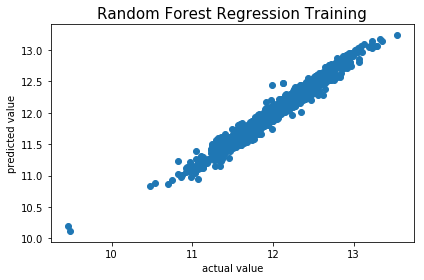

Validation:
RMSE: 0.18886902098149583
R2: 0.7936719863979943


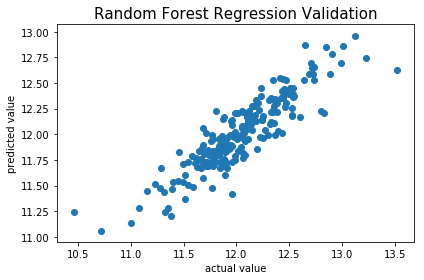

Test:
RMSE: 0.21306747410432936
R2: 0.7323194962822788


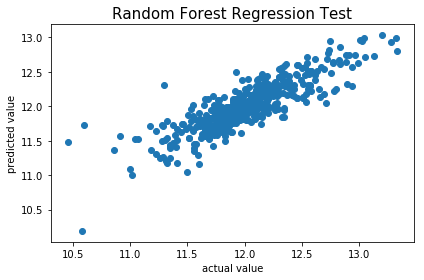

In [19]:
from sklearn.ensemble import RandomForestRegressor
n_estimators_list = [1000]

best_rmse = None
best_model = None

for n_estimators in n_estimators_list:
  model = RandomForestRegressor(n_estimators=n_estimators)
  model.fit(X_trn, y_trn)
  rmse_val = metric.rmse(y_val, model.predict(X_val))
  print("n_estimators: {}, rmse_val: {}".format(n_estimators, rmse_val))
  if best_rmse is None or rmse_val < best_rmse:
    best_rmse = rmse_val
    best_model = model
    
print(best_model)
eval_model(best_model, "Random Forest Regression")